In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [2]:
import yfinance as yf
data = yf.download(tickers="BTC-USD" , start = "2018-01-01" ,end="2022-01-31" )
data = data.resample('30min').ffill()

# Display the fetched data
print(data)

data.to_csv('data.csv')


[*********************100%%**********************]  1 of 1 completed
                             Open          High           Low         Close  \
Date                                                                          
2018-01-01 00:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 00:30:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 01:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 01:30:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 02:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
...                           ...           ...           ...           ...   
2022-01-29 22:00:00  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-29 22:30:00  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-29 23:00:00  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-29 23:30:00  37780.714844  38576.261719  37406.472656 

In [3]:
data_dir = 'data.csv'
df = pd.read_csv(data_dir)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01 00:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-01 00:30:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2,2018-01-01 01:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
3,2018-01-01 01:30:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
4,2018-01-01 02:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
71516,2022-01-29 22:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
71517,2022-01-29 22:30:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
71518,2022-01-29 23:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
71519,2022-01-29 23:30:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
71520,2022-01-30 00:00:00,38151.917969,38266.339844,37437.710938,37917.601562,37917.601562,14643548444


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71521 entries, 0 to 71520
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       71521 non-null  object 
 1   Open       71521 non-null  float64
 2   High       71521 non-null  float64
 3   Low        71521 non-null  float64
 4   Close      71521 non-null  float64
 5   Adj Close  71521 non-null  float64
 6   Volume     71521 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ MB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,71521.000000,71521.000000,71521.000000,71521.000000,71521.000000,7.152100e+04
mean,18808.908688,19302.730988,18252.391541,18821.995148,18821.995148,2.584333e+10
std,17869.713090,18356.469010,17301.769355,17870.582940,17870.582940,2.104057e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7179.283203,7319.856934,6936.706543,7176.414551,7176.414551,8.438110e+09
50%,9539.485352,9711.889648,9349.545898,9538.024414,9538.024414,2.248291e+10
75%,32564.029297,33858.312500,31223.990234,32702.025391,32702.025391,3.621693e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

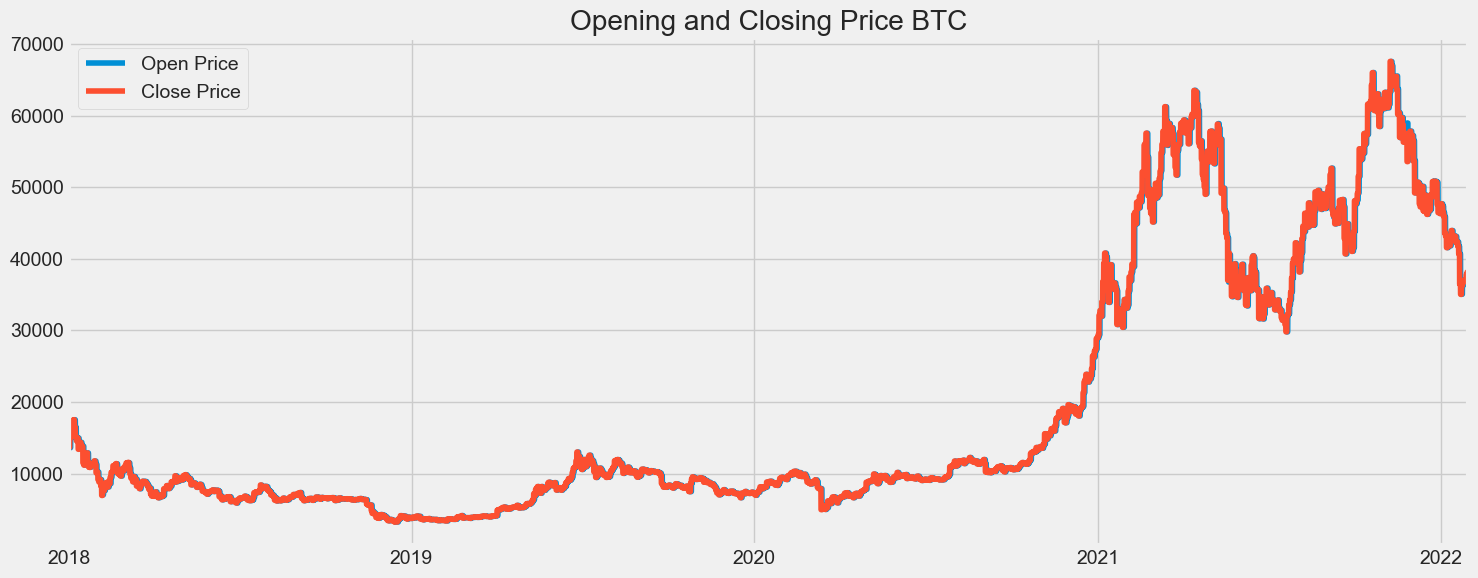

In [9]:
plt.figure(figsize=(15, 6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and Closing Price BTC')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

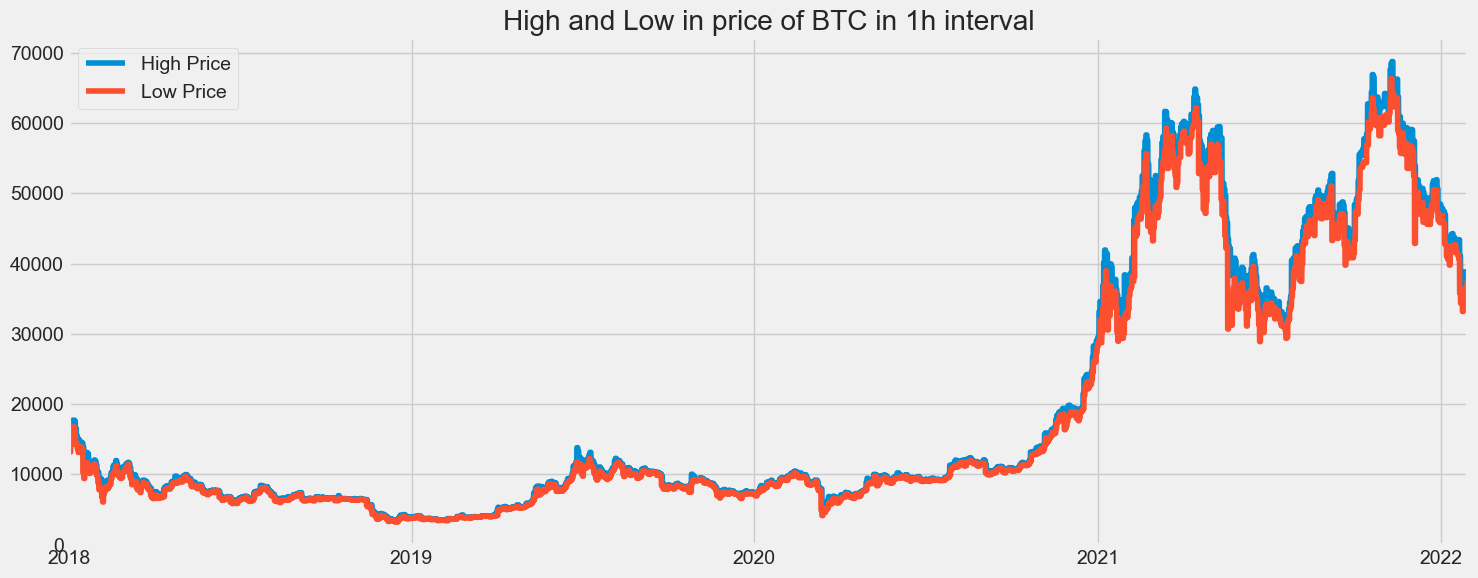

In [10]:
plt.figure(figsize=(15, 6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low in price of BTC in 1h interval')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [11]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(71521, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [13]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print('Train Size: ', train_size, 'Test size: ', test_size)

Train Size:  53640 Test size:  17881


In [14]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(53640, 1)

In [15]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i <= time_steps:
        print('X_train: ', x_train)
        print('Y_train: ', y_train)

X_train:  [array([[0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
  

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [18]:
x_train.shape, y_train.shape

((53580, 60, 1), (53580, 1))

In [19]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer='adam', loss='mse', metrics='mean_absolute_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1675/1675 [==============================] - 56s 31ms/step - loss: 3.6162e-05 - mean_absolute_error: 0.0026
Epoch 2/10
1675/1675 [==============================] - 59s 35ms/step - loss: 1.0279e-05 - mean_absolute_error: 0.0019
Epoch 3/10
1675/1675 [==============================] - 55s 33ms/step - loss: 7.0962e-06 - mean_absolute_error: 0.0016
Epoch 4/10
1675/1675 [==============================] - 56s 34ms/step - loss: 7.1513e-06 - mean_absolute_error: 0.0016
Epoch 5/10
1675/1675 [==============================] - 55s 33ms/step - loss: 4.2495e-06 - mean_absolute_error: 0.0012
Epoch 6/10
1675/1675 [==============================] - 55s 33ms/step - loss: 4.5724e-06 - mean_absolute_error: 0.0013
Epoch 7/10
1675/1675 [==============================] - 50s 30ms/step - loss: 4.5621e-06 - mean_absolute_error: 0.0012
Epoch 8/10
1675/1675 [==============================] - 47s 28ms/step - loss: 4.1781e-06 - mean_absolute_error: 0.0011
Epoch 9/10
1675/1675 [==========================

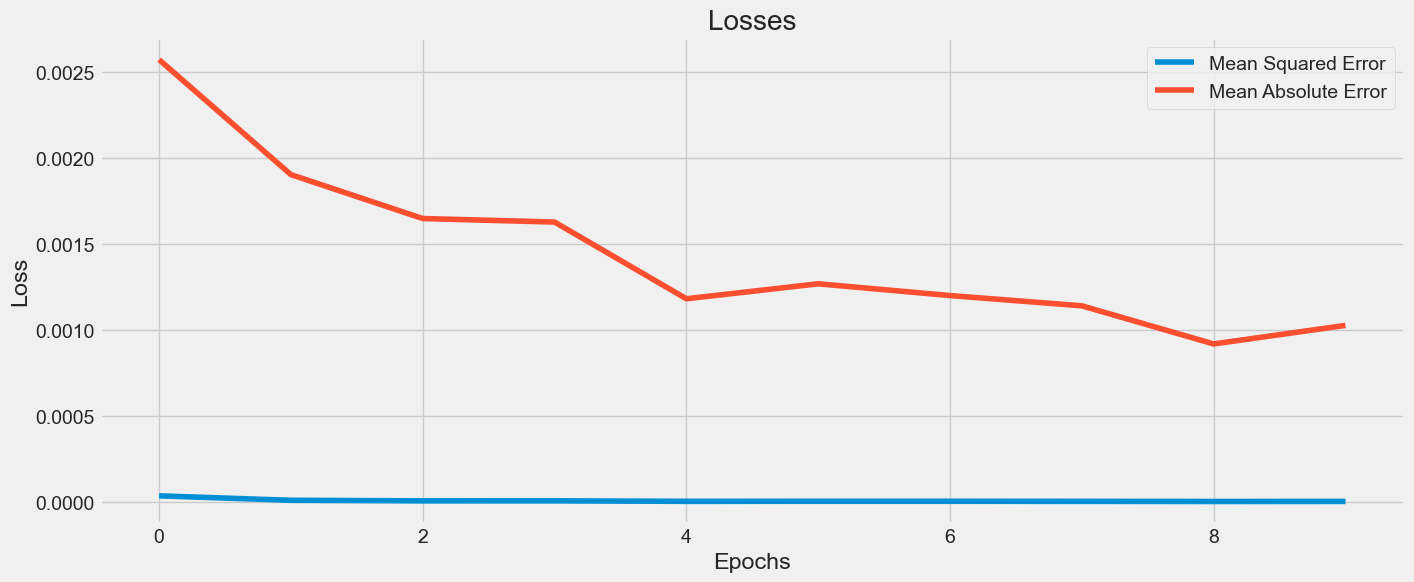

In [22]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
time_steps = 60
test_data = scaled_data[train_size-time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [24]:
x_test.shape , y_test.shape

((17881, 60, 1), (17881, 1))

In [25]:
predictions = model.predict(x_test)

559/559 [==============================] - 7s 11ms/step


In [26]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(17881, 1)

In [27]:
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test-predictions)**2).round(2)
rmse

190.52

In [28]:
preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})
preds_acts

,Predictions,Actuals
0,32981.519531,33005.761719
1,32982.300781,33005.761719
2,32982.957031,33005.761719
3,32983.492188,33005.761719
4,32983.917969,33005.761719
...,...,...
17876,38098.335938,38138.179688
17877,38098.343750,38138.179688
17878,38098.343750,38138.179688
17879,38098.339844,38138.179688


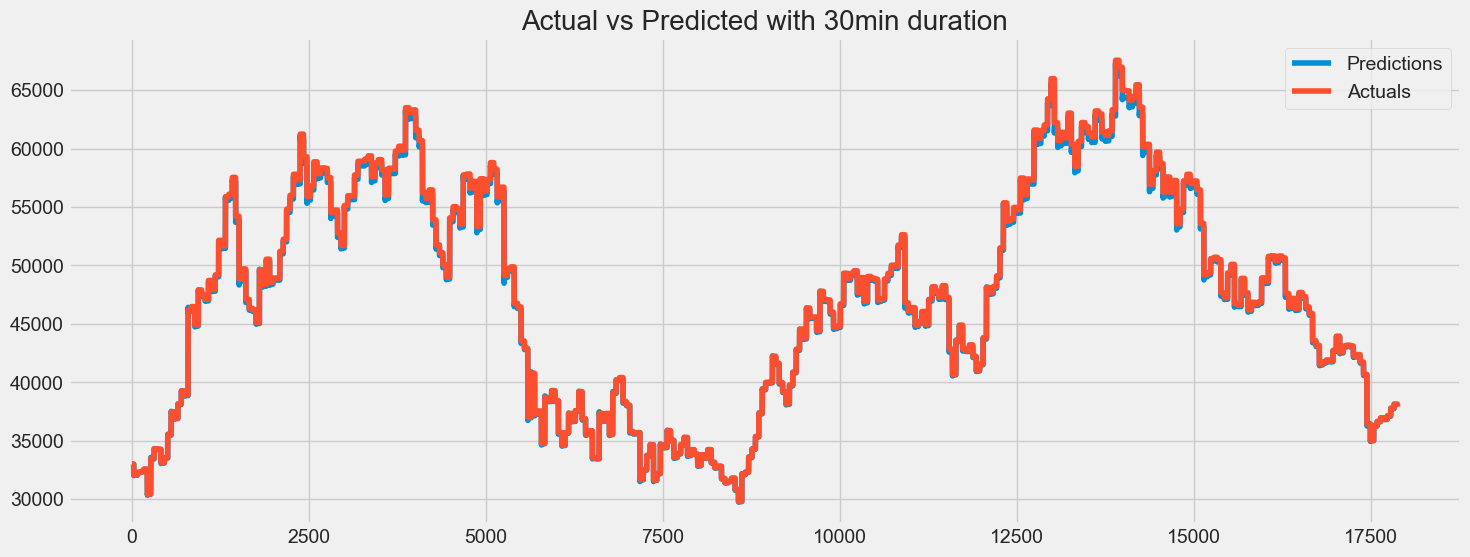

In [32]:
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted with 30min duration', fontsize=20)

plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

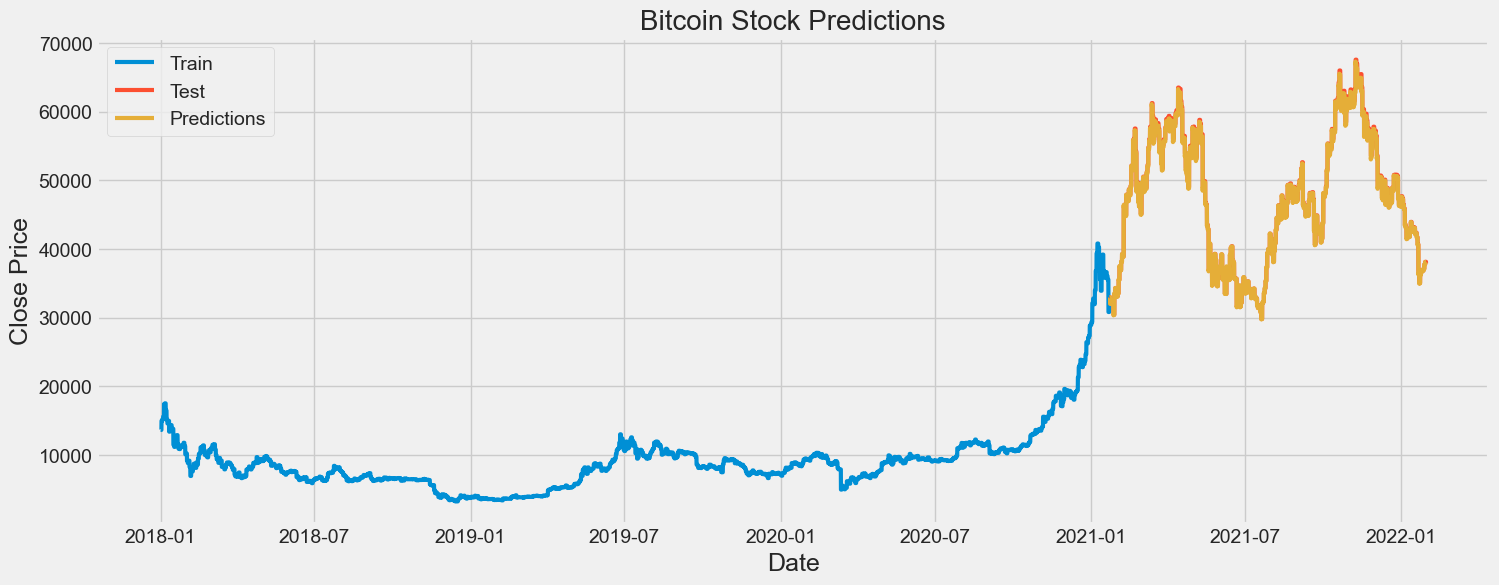

In [30]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Bitcoin Stock Predictions', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train[r'Close'], linewidth=3)
plt.plot(test[r'Close'], linewidth=3)


plt.plot(test['Predictions'], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [31]:
model.save('Model.h5')

C:\Users\Arjun Datta PC\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
